In [82]:
# Import the Libraries


import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure


In [83]:
#Read in the dataframe

df = pd.read_csv(r'C:\Users\amyar\Downloads\disney_movies.csv')

print(df)
df.head(10)

                         movie_title release_date      genre mpaa_rating  \
0    Snow White and the Seven Dwarfs   1937-12-21    Musical           G   
1                          Pinocchio   1940-02-09  Adventure           G   
2                           Fantasia   1940-11-13    Musical           G   
3                  Song of the South   1946-11-12  Adventure           G   
4                         Cinderella   1950-02-15      Drama           G   
..                               ...          ...        ...         ...   
574         The Light Between Oceans   2016-09-02      Drama       PG-13   
575                   Queen of Katwe   2016-09-23      Drama          PG   
576                   Doctor Strange   2016-11-04  Adventure       PG-13   
577                            Moana   2016-11-23  Adventure          PG   
578     Rogue One: A Star Wars Story   2016-12-16  Adventure       PG-13   

     total_gross  inflation_adjusted_gross  
0      184925485                5228953251

,movie_title,release_date,genre,mpaa_rating,total_gross,inflation_adjusted_gross
0,Snow White and the Seven Dwarfs,1937-12-21,Musical,G,184925485,5228953251
1,Pinocchio,1940-02-09,Adventure,G,84300000,2188229052
2,Fantasia,1940-11-13,Musical,G,83320000,2187090808
3,Song of the South,1946-11-12,Adventure,G,65000000,1078510579
4,Cinderella,1950-02-15,Drama,G,85000000,920608730
5,"20,000 Leagues Under the Sea",1954-12-23,Adventure,NaN,28200000,528279994
6,Lady and the Tramp,1955-06-22,Drama,G,93600000,1236035515
7,Sleeping Beauty,1959-01-29,Drama,NaN,9464608,21505832
8,101 Dalmatians,1961-01-25,Comedy,G,153000000,1362870985
9,The Absent Minded Professor,1961-03-16,Comedy,NaN,25381407,310094574


In [84]:
#Check for Null values in each category

(df.isna().sum()/df.shape[0]) * 100

movie_title                 0.000000
release_date                0.000000
genre                       2.936097
mpaa_rating                 9.671848
total_gross                 0.000000
inflation_adjusted_gross    0.000000
dtype: float64

In [85]:
#There were Nulls but the majority are in mpaa_rating, which we will not be using. There's a small percentage in genre which should not affect our data.
#Figure out what the different types of genres are and how many types.

df['genre'].unique()

array(['Musical', 'Adventure', 'Drama', 'Comedy', nan, 'Action', 'Horror',
       'Romantic Comedy', 'Thriller/Suspense', 'Western', 'Black Comedy',
       'Documentary', 'Concert/Performance'], dtype=object)

In [86]:
df['genre'].nunique()

12

In [107]:
df.groupby('genre').size()

genre
Action                  40
Adventure              129
Black Comedy             3
Comedy                 182
Concert/Performance      2
Documentary             16
Drama                  114
Horror                   6
Musical                 16
Romantic Comedy         23
Thriller/Suspense       24
Western                  7
dtype: int64

In [108]:
#Disney has started remaking a lot of their movies. Check for duplicate title names.

remakes = df['movie_title'].value_counts().loc[lambda x: x > 1]

remakes.head()

The Jungle Book    3
Freaky Friday      2
Cinderella         2
Bad Company        2
101 Dalmatians     2
Name: movie_title, dtype: int64

In [109]:
#Separate the release_date into months and years to make it easier to use in the future

release_date_split = df['release_date'].str.split('-')
df['release_year'] = release_date_split.str.get(0)
df['release_month'] = release_date_split.str.get(1)

df.head()

,movie_title,release_date,genre,mpaa_rating,total_gross,inflation_adjusted_gross,release_year,release_month
0,Snow White and the Seven Dwarfs,1937-12-21,Musical,G,184925485,5228953251,1937,12
1,Pinocchio,1940-02-09,Adventure,G,84300000,2188229052,1940,02
2,Fantasia,1940-11-13,Musical,G,83320000,2187090808,1940,11
3,Song of the South,1946-11-12,Adventure,G,65000000,1078510579,1946,11
4,Cinderella,1950-02-15,Drama,G,85000000,920608730,1950,02


In [110]:
#Find the highest grossing Disney movie in the dataset, and the genre that generally brings in the highest grossing revenue.

highest_grossing = df.sort_values(by = 'inflation_adjusted_gross', ascending = False)
highest_grossing.head(10)

,movie_title,release_date,genre,mpaa_rating,total_gross,inflation_adjusted_gross,release_year,release_month
0,Snow White and the Seven Dwarfs,1937-12-21,Musical,G,184925485,5228953251,1937,12
1,Pinocchio,1940-02-09,Adventure,G,84300000,2188229052,1940,02
2,Fantasia,1940-11-13,Musical,G,83320000,2187090808,1940,11
8,101 Dalmatians,1961-01-25,Comedy,G,153000000,1362870985,1961,01
6,Lady and the Tramp,1955-06-22,Drama,G,93600000,1236035515,1955,06
3,Song of the South,1946-11-12,Adventure,G,65000000,1078510579,1946,11
564,Star Wars Ep. VII: The Force Awakens,2015-12-18,Adventure,PG-13,936662225,936662225,2015,12
4,Cinderella,1950-02-15,Drama,G,85000000,920608730,1950,02
13,The Jungle Book,1967-10-18,Musical,Not Rated,141843000,789612346,1967,10
179,The Lion King,1994-06-15,Adventure,G,422780140,761640898,1994,06


In [111]:
avg_grossing_genre = df.groupby('genre').inflation_adjusted_gross.mean().reset_index()

In [112]:
highest_grossing_genre = avg_grossing_genre.sort_values(by = 'inflation_adjusted_gross', ascending = False)

highest_grossing_genre.head(12)

,genre,inflation_adjusted_gross
8,Musical,6.035979e+08
1,Adventure,1.903974e+08
0,Action,1.374734e+08
10,Thriller/Suspense,8.965379e+07
3,Comedy,8.466773e+07
9,Romantic Comedy,7.777708e+07
11,Western,7.381571e+07
6,Drama,7.189302e+07
4,Concert/Performance,5.741084e+07
2,Black Comedy,5.224349e+07


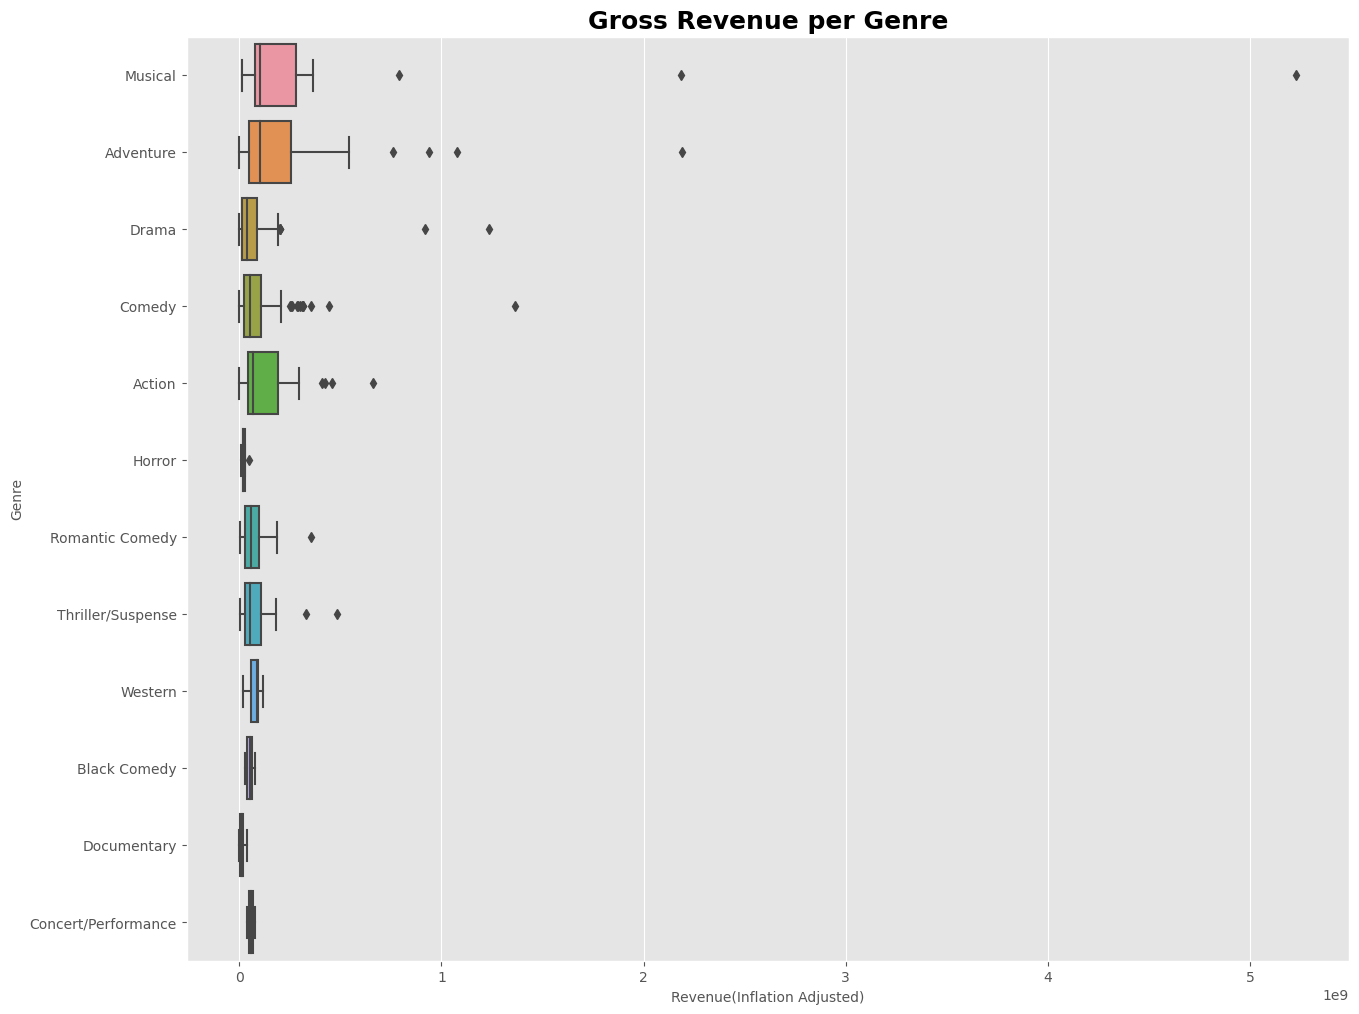

In [113]:
plt.figure(figsize=(15, 12))
sns.boxplot(x = df['inflation_adjusted_gross'], y = df['genre'])
plt.title('Gross Revenue per Genre', fontsize=18 ,fontweight='bold')
plt.ylabel('Genre', fontsize=10)
plt.xlabel('Revenue(Inflation Adjusted)', fontsize=10)
plt.show()